<a href="https://colab.research.google.com/github/rmnvg/stockprice_prediction/blob/main/Tesla.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ta

  Using cached ta-0.11.0.tar.gz (25 kB)
  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29412 sha256=909225ea7b7b5751842b9a38648b188fe0170a204e700f97a4258d8d47452017
  Stored in directory: /root/.cache/pip/wheels/a1/d7/29/7781cc5eb9a3659d032d7d15bdd0f49d07d2b24fec29f44bc4
Successfully built ta


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ta
from textblob import TextBlob
from google.colab import files

uploaded = files.upload()

In [ ]:
df = pd.read_csv("Tesla_Final_dataset.csv")

# TSLA_complete_dataset_non_null.csv
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')
    df.set_index('Date', inplace=True)

df["SMA_50"] = ta.trend.sma_indicator(df["Close"], window=50)
df["SMA_200"] = ta.trend.sma_indicator(df["Close"], window=200)
df["EMA_50"] = ta.trend.ema_indicator(df["Close"], window=50)
df["RSI"] = ta.momentum.rsi(df["Close"], window=14)
df["MACD"] = ta.trend.macd(df["Close"])

fundamental_features = ['totalAssets', 'totalRevenue', 'netIncome_x', 'operatingCashflow']
for feature in fundamental_features:
    if feature not in df.columns:
        df[feature] = np.nan

macro_features = ['GDP', 'Inflation', 'Unemployment']
for feature in macro_features:
    if feature not in df.columns:
        df[feature] = np.nan

df.fillna(method='ffill', inplace=True)
df.fillna(method='bfill', inplace=True)
df.fillna(0, inplace=True)


df.to_csv("Processed_Data.csv", index=True)
print("✅ Data Preprocessing Complete! Saved as 'Processed_Data.csv'.")
print("Dataset shape:", df.shape)
print(df.head())

<ipython-input-4-1acb9e77747d>:4: UserWarning: Parsing dates in %Y-%m-%d format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')
<ipython-input-4-1acb9e77747d>:23: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)
<ipython-input-4-1acb9e77747d>:24: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)


✅ Data Preprocessing Complete! Saved as 'Processed_Data.csv'.
Dataset shape: (3860, 87)
               Close      Open      High       Low    Volume          GDP  \
Date                                                                        
2010-06-30  1.924705  1.961569  1.934446  1.919532  12547500  14340.41151   
2010-07-01  1.921724  1.889232  1.963181  1.900459  12547500  14349.65354   
2010-07-02  1.926447  1.956093  1.932474  1.895909  12547500  14383.09780   
2010-07-05  1.931564  1.942923  1.940633  1.908199  12547500  14305.07820   
2010-07-06  1.932579  1.943027  1.940866  1.924862  12547500  14477.54113   

             Inflation  Unemployment Rate  Interest Rate  capitalExpenditures  \
Date                                                                            
2010-06-30  230.691291           8.969799       0.073253          43583301.48   
2010-07-01  227.482247           8.981781       0.072789          43887996.20   
2010-07-02  226.860696           9.043186       

hybrid final

Epoch 1/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0534
Epoch 2/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0012
Epoch 3/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.1274e-04
Epoch 4/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.0809e-04
Epoch 5/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.7301e-04
Epoch 6/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.5719e-04
Epoch 7/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.3490e-04
Epoch 8/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1740e-04
Epoch 9/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0852e-04
Epoch 10/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0096e-04
Epoch 11/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9.7305e-05
Epoch 12/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.9603e-05
Epoch 13/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8.1232e-05
Epoch 14/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 8.0378e-05
Epoch 15/50
94/94 ━━━━━━━━━━━━━━━━━━━

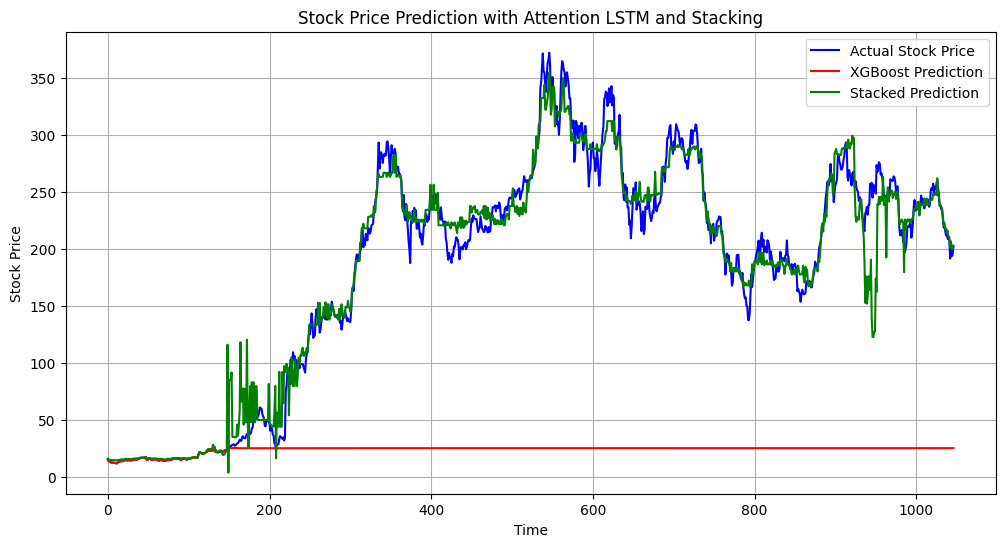

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input, Attention
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import IsolationForest


def compute_rsi(series, window=14):
    delta = series.diff(1)
    gain = delta.where(delta > 0, 0).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi


data = pd.read_csv('Processed_Data.csv')


features = ['Open', 'High', 'Low', 'Volume', 'totalRevenue', 'totalAssets',
            'Unemployment Rate', 'GDP', 'Inflation']

data['MA7'] = data['Close'].rolling(window=7).mean()
data['MA21'] = data['Close'].rolling(window=21).mean()
data['EMA'] = data['Close'].ewm(span=20, adjust=False).mean()
data['RSI'] = compute_rsi(data['Close'], window=14)

data.dropna(inplace=True)

iso_forest = IsolationForest(contamination=0.05, random_state=42)
preds = iso_forest.fit_predict(data[features])
data = data[preds == 1].reset_index(drop=True)


def build_autoencoder(input_dim):
    input_layer = Input(shape=(input_dim,))
    encoded = Dense(64, activation='relu')(input_layer)
    encoded = Dense(32, activation='relu')(encoded)
    encoded = Dense(16, activation='relu')(encoded)
    decoded = Dense(32, activation='relu')(encoded)
    decoded = Dense(64, activation='relu')(decoded)
    output_layer = Dense(input_dim, activation='linear')(decoded)
    autoencoder = Model(input_layer, output_layer)
    encoder = Model(input_layer, encoded)
    autoencoder.compile(optimizer='adam', loss='mse')
    return autoencoder, encoder

scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(data[features])

autoencoder, encoder = build_autoencoder(scaled_features.shape[1])
autoencoder.fit(scaled_features, scaled_features, epochs=50, batch_size=32, verbose=1)

encoded_features = encoder.predict(scaled_features)
data_encoded = pd.DataFrame(encoded_features)
data_encoded['Close'] = data['Close'].values


def create_sequences(data, seq_length=60):
    X, y = [], []
    for i in range(seq_length, len(data)):
        X.append(data[i-seq_length:i, :-1])
        y.append(data[i, -1])
    return np.array(X), np.array(y)

seq_length = 100
data_encoded.columns = data_encoded.columns.astype(str)

split_index = int(len(data_encoded) * 0.7)
train_data = data_encoded.iloc[:split_index]
test_data = data_encoded.iloc[split_index:]


scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train_data)
test_scaled = scaler.transform(test_data)

scaled_full = np.concatenate((train_scaled, test_scaled), axis=0)

X, y = create_sequences(scaled_full, seq_length)


train_size = split_index - seq_length
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

print(f"Train sequences: {X_train.shape}, Test sequences: {X_test.shape}")

def build_attention_lstm(input_shape):
    inputs = Input(shape=input_shape)
    x = LSTM(128, return_sequences=True)(inputs)
    attention = Attention()([x, x])
    x = LSTM(64)(attention)
    x = Dropout(0.3)(x)
    output = Dense(1)(x)
    model = Model(inputs, output)
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

lstm_model = build_attention_lstm((X_train.shape[1], X_train.shape[2]))
lstm_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1)

lstm_predictions = lstm_model.predict(X_test)


X_xgb_train = X_train[:, -1, :]
X_xgb_test = X_test[:, -1, :]

xgb_reg = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_reg.fit(X_xgb_train, y_train)

xgb_predictions = xgb_reg.predict(X_xgb_test)


data_encoded['LSTM_Prediction'] = np.nan
data_encoded['XGBoost_Prediction'] = np.nan


start_idx = seq_length + (split_index - seq_length)  # equals split_index

data_encoded.loc[start_idx : start_idx + len(lstm_predictions) - 1, 'LSTM_Prediction'] = lstm_predictions.flatten()


data_encoded.loc[start_idx : start_idx + len(xgb_predictions) - 1, 'XGBoost_Prediction'] = xgb_predictions.flatten()


final_data = data_encoded.dropna(subset=['LSTM_Prediction', 'XGBoost_Prediction']).reset_index(drop=True)

print(f"Final data length after dropping NaNs: {len(final_data)}")


X_stack = np.column_stack((final_data['LSTM_Prediction'], final_data['XGBoost_Prediction']))
y_stack = final_data['Close'].values


stacked_model = GradientBoostingRegressor()
stacked_model.fit(X_stack, y_stack)

stacked_preds = stacked_model.predict(X_stack)


rmse_stacked = np.sqrt(mean_squared_error(y_stack, stacked_preds))
mae_stacked = mean_absolute_error(y_stack, stacked_preds)
#r2_stacked = r2_score(y_stack, stacked_preds)

#print(f"Stacked Model RMSE: {rmse_stacked:.4f}, MAE: {mae_stacked:.4f}, R²: {r2_stacked:.4f}")
print(f"Stacked Model RMSE: {rmse_stacked:.4f}, MAE: {mae_stacked:.4f}")

# --- Plot results ---
plt.figure(figsize=(12,6))
plt.plot(y_stack, label='Actual Price', color='blue')
plt.plot(final_data['XGBoost_Prediction'], label='XGBoost Prediction', color='red', alpha=0.6)
plt.plot(stacked_preds, label='Stacked Prediction', color='green')
plt.title('Stock Price Prediction with Attention LSTM + XGBoost + Stacking')
plt.xlabel('Samples')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()
